In [32]:
import torch
from torchvision import datasets, transforms
import helper
import torch.nn.functional as F

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

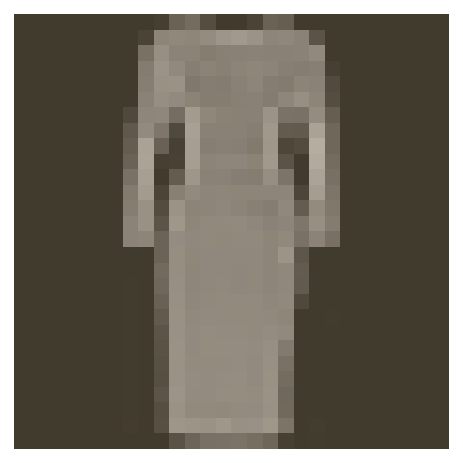

In [33]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [3]:
image[0].shape[0]

1

In [4]:
images = image.view(image.shape[0],-1)
images.shape

torch.Size([64, 784])

In [34]:
from torch import nn, optim


In [6]:
model = nn.Sequential(nn.Linear(784,256),
                            nn.ReLU(),
                            nn.Linear(256,128),
                            nn.ReLU(),
                            nn.Linear(128,64),
                            nn.ReLU(),
                            nn.Linear(64,10),
                            nn.LogSoftmax(dim=1))

In [7]:
logit = model(images)

In [8]:
print('Gradient -', model[0].weight.grad)
optimizer = optim.Adam(model.parameters(), lr = 0.01)
optimizer.zero_grad()
criterion = nn.NLLLoss()
loss = criterion(logit, label)
loss.backward()
print('Gradient -', model[0].weight.grad)
optimizer.step()
print('Updated weights - ', model[0].weight)

Gradient - None
Gradient - tensor([[-6.8727e-04, -6.8727e-04, -6.8727e-04,  ..., -6.7793e-04,
         -6.8727e-04, -6.8727e-04],
        [ 2.6635e-05,  2.6635e-05,  2.6635e-05,  ...,  4.3393e-05,
          2.6635e-05,  2.6635e-05],
        [-4.3744e-04, -4.3744e-04, -4.3744e-04,  ..., -4.9725e-04,
         -4.3744e-04, -4.3744e-04],
        ...,
        [ 5.0048e-04,  5.0048e-04,  5.0048e-04,  ...,  4.9748e-04,
          5.0048e-04,  5.0048e-04],
        [-5.4340e-04, -5.4340e-04, -5.4340e-04,  ..., -5.3296e-04,
         -5.4340e-04, -5.4340e-04],
        [-4.6478e-04, -4.6478e-04, -4.6478e-04,  ..., -4.6604e-04,
         -4.6478e-04, -4.6478e-04]])
Updated weights -  Parameter containing:
tensor([[ 0.0063, -0.0048, -0.0141,  ...,  0.0004, -0.0067, -0.0253],
        [ 0.0072, -0.0280, -0.0186,  ...,  0.0114,  0.0199, -0.0174],
        [ 0.0107,  0.0401,  0.0044,  ...,  0.0283,  0.0416, -0.0136],
        ...,
        [-0.0217, -0.0042,  0.0011,  ...,  0.0102,  0.0070, -0.0077],
       

In [44]:
model = nn.Sequential(nn.Linear(784,256),
                            nn.ReLU(),
                            nn.Linear(256,128),
                            nn.ReLU(),
                            nn.Linear(128,64),
                            nn.ReLU(),
                            nn.Linear(64,10),
                            nn.LogSoftmax(dim=1))

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5231570158558868
Training loss: 0.37971658448674783
Training loss: 0.33771616179170383
Training loss: 0.3129653828198722
Training loss: 0.29241654364221387


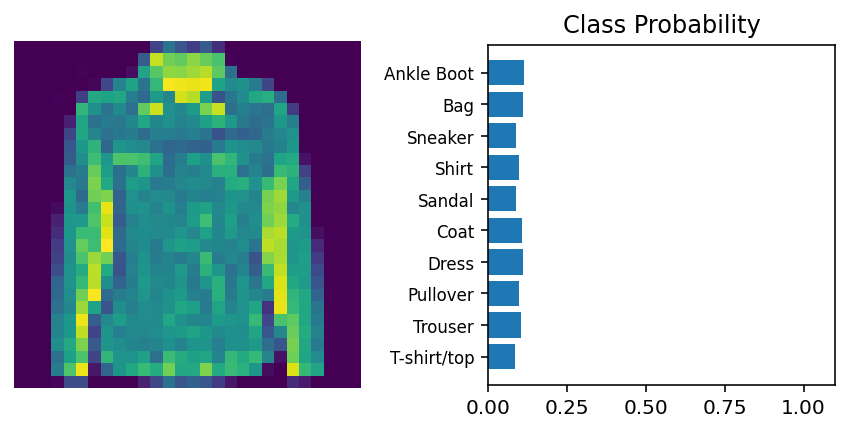

In [43]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

In [11]:
images.shape

torch.Size([64, 1, 28, 28])

In [12]:
images = images.view(images.shape[0], -1)

In [48]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
    
    def forward(self,x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x
      

In [51]:
epoch = 5
model = Classifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adamax(model.parameters(), lr = 0.001)


for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
        
        

Training loss: 0.5612049602877611
Training loss: 0.40564105380127935
Training loss: 0.36135126408864693
Training loss: 0.332435028091359
Training loss: 0.3116338870355061


tensor([[6.5170e-07, 2.5334e-06, 5.9019e-07, 6.1228e-06, 1.2085e-06, 4.4814e-03,
         2.8415e-07, 9.9495e-01, 1.1843e-04, 4.4270e-04]],
       grad_fn=<DivBackward0>)
tensor([[6.5170e-07, 2.5334e-06, 5.9019e-07, 6.1228e-06, 1.2085e-06, 4.4814e-03,
         2.8415e-07, 9.9495e-01, 1.1843e-04, 4.4270e-04]],
       grad_fn=<ExpBackward0>)


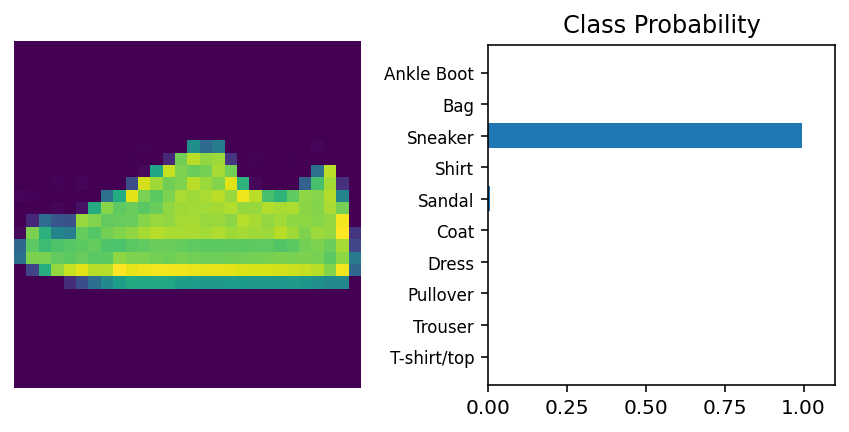

In [75]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
img = img.view(img.shape[0],-1)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))
a = torch.exp(model(img))/torch.sum(torch.exp(model(img)), dim=1).view(-1, 1)
b = torch.exp(model(img))
print(a)
print(b)

# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')

In [16]:
model = Classifier()

In [17]:
#images = images.view(images.shape[0],-1)

In [18]:
logit= model(images)

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

In [20]:
model.fc1.weight.data

tensor([[ 0.0041,  0.0145, -0.0184,  ...,  0.0029, -0.0343, -0.0235],
        [ 0.0354, -0.0041,  0.0319,  ..., -0.0223,  0.0062, -0.0035],
        [-0.0178,  0.0352,  0.0155,  ..., -0.0117, -0.0301,  0.0159],
        ...,
        [-0.0262,  0.0189, -0.0087,  ...,  0.0169,  0.0125,  0.0183],
        [-0.0315, -0.0082, -0.0144,  ...,  0.0138,  0.0212,  0.0045],
        [ 0.0048, -0.0160,  0.0148,  ..., -0.0144,  0.0098, -0.0236]])

In [21]:
optimizer.zero_grad()

In [22]:
loss = criterion(model(images),label)

In [23]:
loss.backward()

In [24]:
optimizer.step()

In [25]:
model.fc1.weight.data

tensor([[ 0.0141,  0.0245, -0.0084,  ...,  0.0129, -0.0243, -0.0135],
        [ 0.0254, -0.0141,  0.0219,  ..., -0.0323, -0.0038, -0.0135],
        [-0.0078,  0.0452,  0.0255,  ..., -0.0017, -0.0201,  0.0259],
        ...,
        [-0.0162,  0.0289,  0.0013,  ...,  0.0269,  0.0225,  0.0283],
        [-0.0215,  0.0018, -0.0044,  ...,  0.0238,  0.0312,  0.0145],
        [-0.0052, -0.0260,  0.0048,  ..., -0.0244, -0.0002, -0.0336]])